# Explorando Data Real

# Clasificación de estrellas

Recibiste un archivo con observaciones astronómicas, <a href="../data/star_classification.csv" download>star_classification.csv</a>, tomadas por un proyecto pequeño de clasificación de objetos.
Nadie te dio una hoja de ruta: tu trabajo como científico de datos es **investigar** qué hay dentro, formular preguntas y
ver si es posible separar clases (por ejemplo: estrella / galaxia / quasar) usando las variables medidas.

Este notebook te guía paso a paso: desde la carga del archivo hasta las primeras visualizaciones y conclusiones.

`````{tip}
Antes de ejecutar una celda, intenta predecir (en voz alta) la salida esperada — esto mejora la comprensión.
`````



In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")
%matplotlib inline

print("Librerías cargadas: pandas, numpy, matplotlib, seaborn")

Librerías cargadas: pandas, numpy, matplotlib, seaborn


In [11]:
# Cargar el dataset (asegúrate que 'star_classification.csv' esté en el mismo directorio)
dataset_path = "data/star_classification.csv"

df = pd.read_csv(dataset_path)

print(display(df.head(5)))

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


None


In [9]:
# ¿Qué columnas tiene el dataset? + info resumida

columnas = df.columns.tolist()
print("Columnas:", columnas)

print("\nInformación resumida:")
print(df.info())

Columnas: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

Información resumida:
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  str    
 14  redshift    

**Pregunta:** Si no aparece una columna claramente llamada `class` o `label`, revisa las columnas y elige la que represente la categoría a predecir.
En el ejercicio del taller asumiremos que la columna objetivo se llama `class`. Si difiere, reemplaza `class` por el nombre correcto en las celdas siguientes.


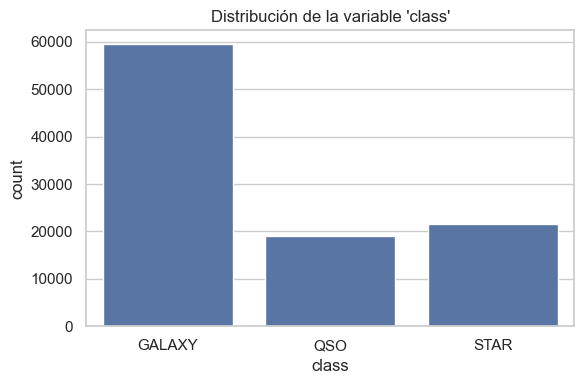

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="class")
plt.title("Distribución de la variable 'class'")
plt.tight_layout()
plt.show()

Columnas numéricas detectadas (hasta 10): ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID']
Usando: u vs g


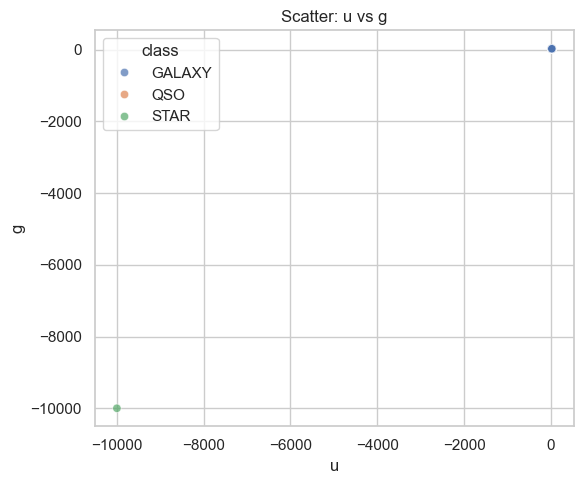

In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas numéricas detectadas (hasta 10):", num_cols[:10])

if len(num_cols) >= 2:
    xcol, ycol = ("u","g") if ("u" in num_cols and "g" in num_cols) else (num_cols[0], num_cols[1])
    print("Usando:", xcol, "vs", ycol)
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x=xcol, y=ycol, hue="class" if "class" in df.columns else None, alpha=0.7)
    plt.title(f"Scatter: {xcol} vs {ycol}")
    plt.tight_layout()
    plt.show()

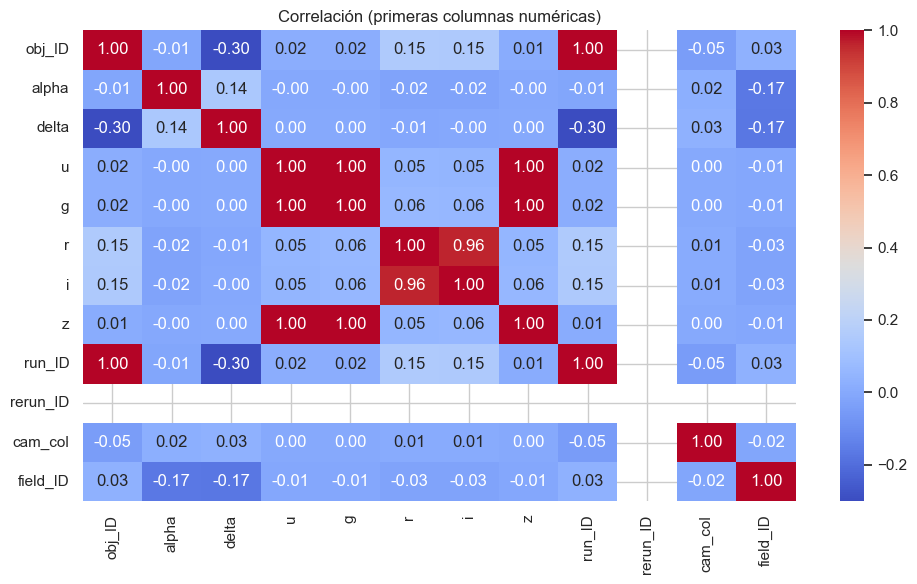

In [14]:
# Heatmap de correlación entre columnas numéricas (limitamos a las primeras 12 si hay muchas)
num = df.select_dtypes(include=[np.number])
if num.shape[1] > 0:
    cols = num.columns.tolist()
    if len(cols) > 12:
        cols = cols[:12]
    plt.figure(figsize=(10,6))
    sns.heatmap(num[cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlación (primeras columnas numéricas)")
    plt.tight_layout()
    plt.show()

**Demostración (sin entrenar modelos):**

Una vez explorados los datos, típicamente separamos en conjuntos de entrenamiento y prueba.
Mostramos cómo hacerlo con `scikit-learn` (no entrenamos aquí, solo mostramos la partición).
Si no tienes scikit-learn instalado, la celda siguiente podría fallar; en Colab debería funcionar.


In [17]:
from sklearn.model_selection import train_test_split
if df is not None and "class" in df.columns:
    train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df["class"])
    print("Tamaños -> train:", train.shape, "test:", test.shape)
elif df is not None:
    train, test = train_test_split(df, test_size=0.2, random_state=42)
    print("Tamaños -> train:", train.shape, "test:", test.shape, "(sin stratify)")
else:
    print("Dataset no cargado")

Tamaños -> train: (80000, 18) test: (20000, 18)
